In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('MNRAS')
from scipy import linalg
from scipy.interpolate import interp1d

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
#survey = 'desy1' # 'desy1thre'
survey = '5k10'

#### default area is 1437 deg^2 (desy1) 
if survey == '5k10' or survey == '5k30':
    survey_area_sq_deg = 5000.
if survey == '15k10' or survey == '15k30':
    survey_area_sq_deg = 15000.

In [5]:
## make the fake data
rich_name = 'q180_bg_miscen'

if survey == 'desy1thre':
    lam = [20, 1000]
else:
    lam = [20, 30, 45, 60, 1000]

nlam = len(lam) - 1

z_data = [0.2, 0.35, 0.5, 0.65]
z_sim = [0.3, 0.4, 0.5]
iz = 0

for binning in ['abun', 'lam']: #, 
    redshift = z_sim[iz]   
    if redshift == 0.3: z_str = '0p300'
    if redshift == 0.4: z_str = '0p400'
    if redshift == 0.5: z_str = '0p500'
    
    data_loc = '/projects/hywu/cluster_sims/cluster_finding/data/emulator_data/base_c000_ph000/'
    data_loc += f'z{z_str}/model_hod000000/obs_{rich_name}_desy1/' # only ran desy1 with abacus
    # get the radius
    rp_list = np.logspace(np.log10(0.03), np.log10(30), 15+1)
    rpmin_list = rp_list[:-1]
    rpmax_list = rp_list[1:]
    rpmid_list = np.sqrt(rpmin_list*rpmax_list)
    rp_rad = rpmid_list[rpmid_list>0.2]
    
    #### lesing data ####
    DS_data = []
    for ilam in range(nlam):
        rp_in, DS_in = np.loadtxt(data_loc + f'DS_phys_noh_{binning}_bin_{ilam}.dat', unpack=True)
        DS_interp = interp1d(np.log(rp_in), np.log(DS_in))
        DS_data.extend(np.exp(DS_interp(np.log(rp_rad))))
    DS_data = np.array(DS_data)
    np.savetxt(f'data_vector_abacus_summit/lensing_{rich_name}_{survey}_{binning}_z{redshift}.dat', DS_data)    
    
    if binning == 'lam':
        #### counts data ####
        x, x, NC_data = np.loadtxt(data_loc+'abundance.dat',unpack=True)
        NC_data = NC_data * survey_area_sq_deg / 1437.
        np.savetxt(f'data_vector_abacus_summit/counts_{rich_name}_{survey}_{binning}_z{redshift}.dat', NC_data)

In [7]:
# # check radius!
# rp_rad = np.loadtxt(f'/projects/hywu/cluster_sims/cluster_finding/data/emulator_train/train/rp_rad.dat')
# rp_cov = np.loadtxt(cov_loc + 'rp_hiMpc_0.35_0.5_60_1000.dat')[:,2] * a / h
# print((rp_cov[4:] - rp_rad)/rp_rad) #okay!

frac noise: DS [0.03348742 0.02817005 0.0251585  0.02363592 0.02422633 0.02837736
 0.03381811 0.03844249 0.041344   0.04515741 0.05293455]
frac noise: DS [0.0372651  0.03018228 0.02595955 0.0236746  0.02326607 0.02636482
 0.03216704 0.03841128 0.0441962  0.05077669 0.06049879]
frac noise: DS [0.05180778 0.0403801  0.03384592 0.03003192 0.02851521 0.03105954
 0.03764503 0.04677149 0.05609611 0.06638717 0.08126718]
frac noise: DS [0.04426261 0.03291311 0.02640643 0.02257541 0.02052576 0.02125893
 0.02534749 0.03248195 0.0415656  0.05172751 0.06593512]
frac noise: NC [0.01255427 0.02108022 0.04053355 0.06703808]
frac noise: DS [0.03308188 0.02778762 0.02480763 0.02329577 0.02384747 0.02792653
 0.0333329  0.03791411 0.0409481  0.04490253 0.05256701]
frac noise: DS [0.03859377 0.03143228 0.02718619 0.02491293 0.02461787 0.02800621
 0.03410856 0.04048997 0.04601771 0.05252624 0.06238506]
frac noise: DS [0.05475174 0.04324681 0.03641758 0.03254052 0.03116402 0.03444471
 0.04195277 0.05190482 

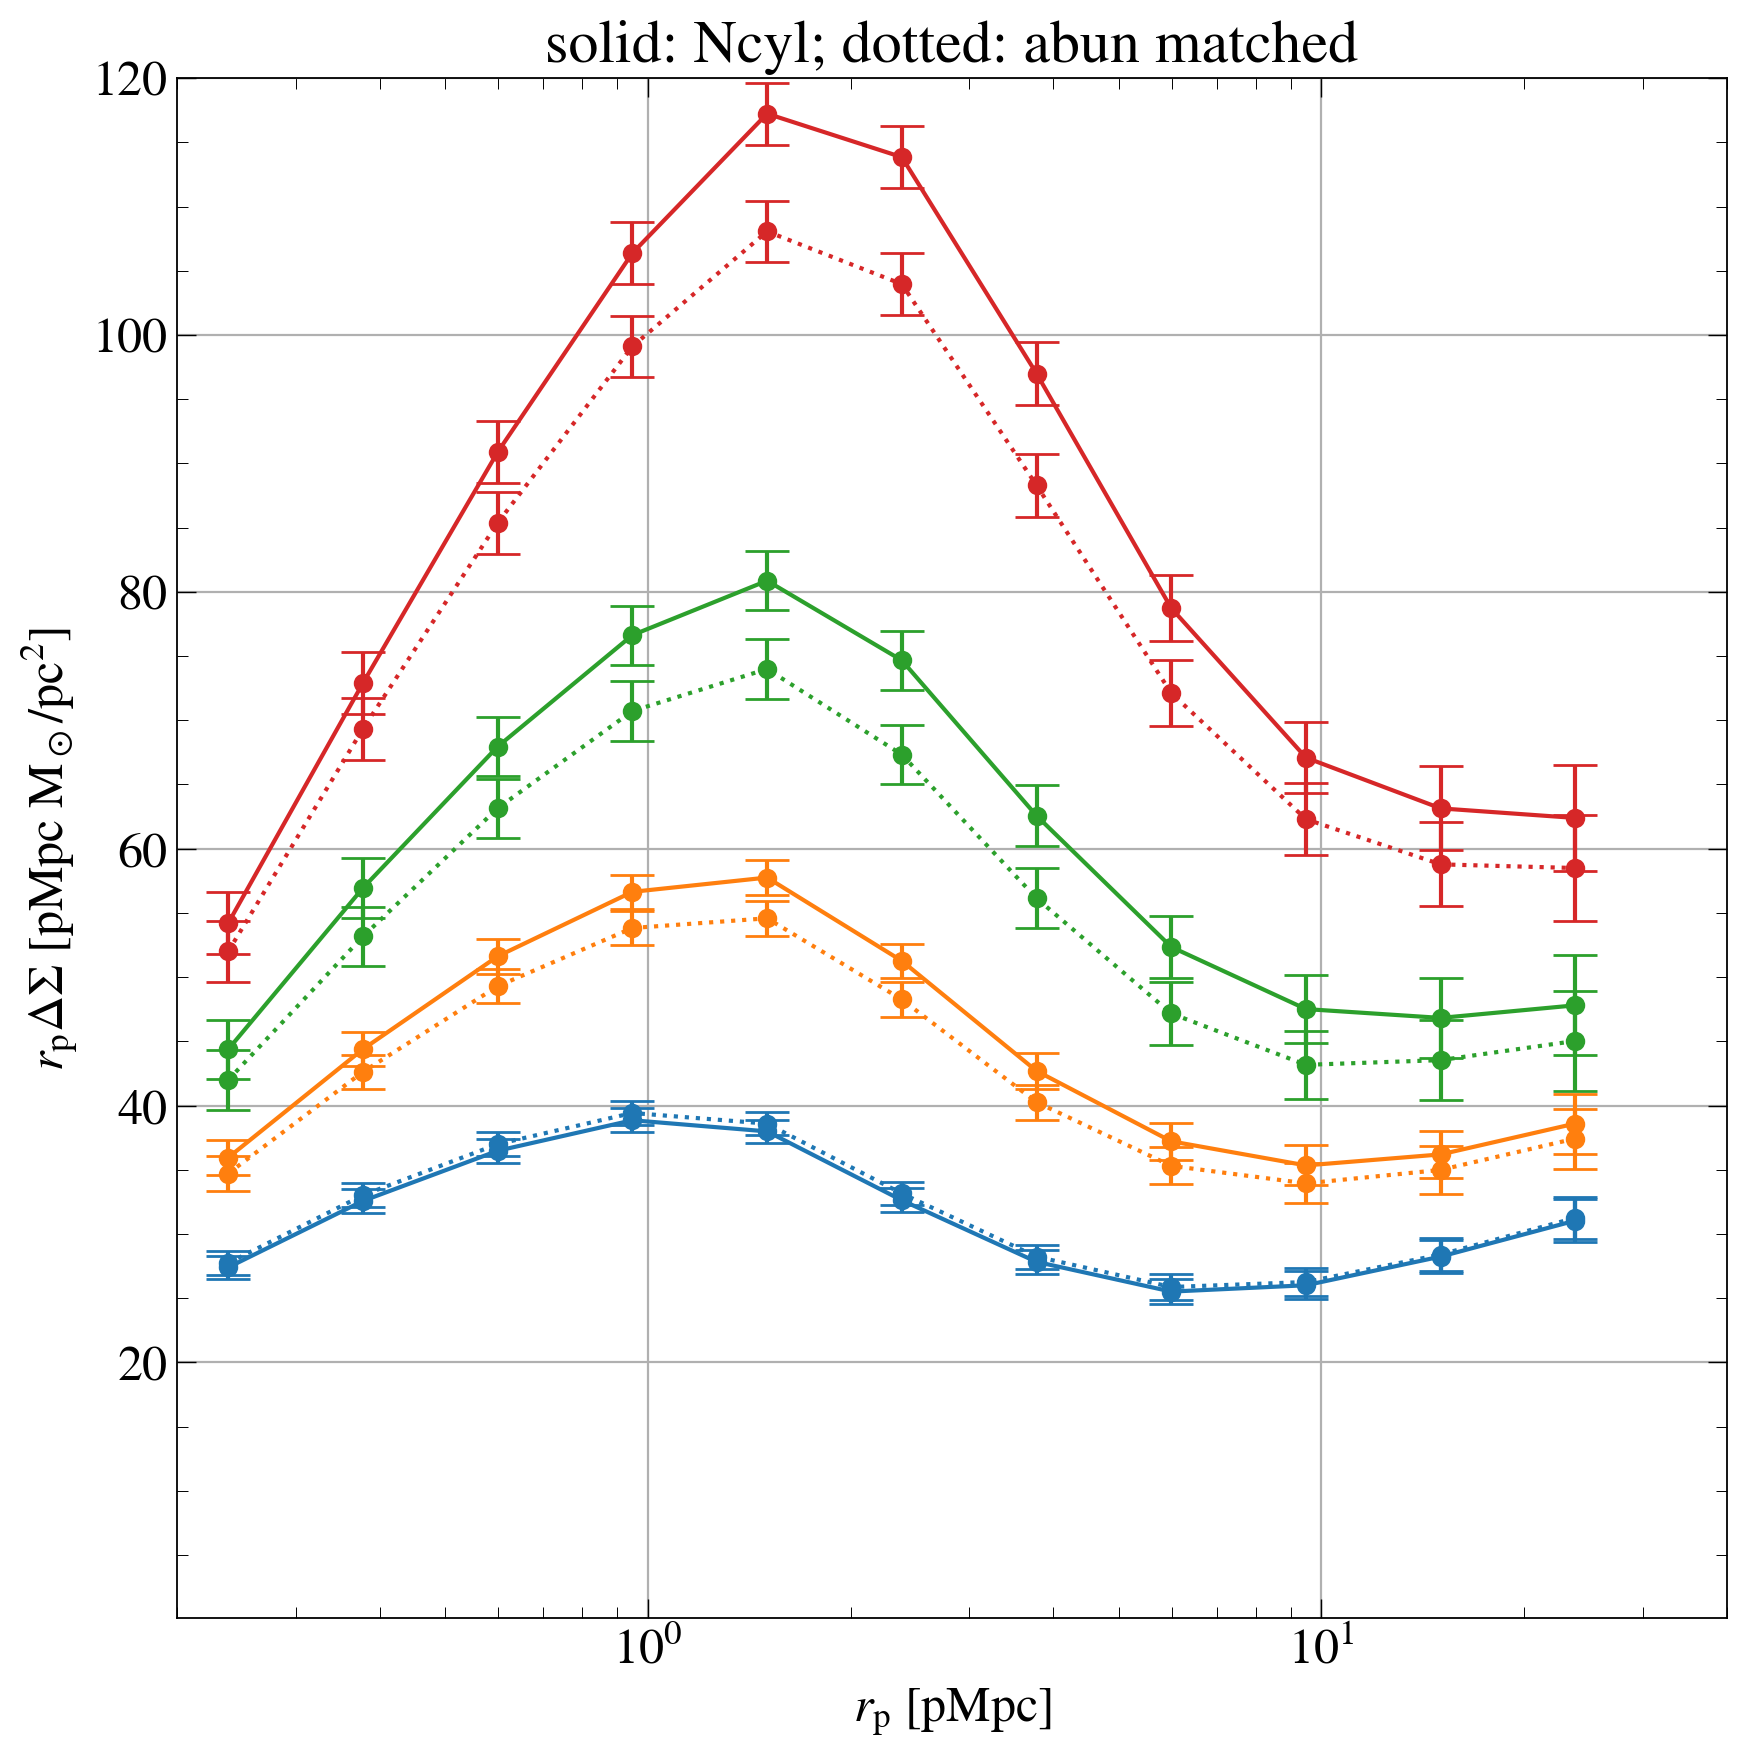

In [7]:
# plot the fake data and error bars
plt.figure(figsize=(10,10))
cov_loc = f'/users/hywu/work/cluster-lensing-cov-public/examples/'
cov_loc += f'abacus_summit_analytic_{survey}/'

#for iz in [0]:#range(3):
    #plt.subplot(1,3,1+iz)
for binning in ['lam', 'abun']:
    if binning == 'lam': ls = '-'
    if binning == 'abun': ls = ':'

    redshift = z_sim[iz]
    data_loc = '/projects/hywu/cluster_sims/cluster_finding/data/emulator_data/base_c000_ph000/'
    data_loc += f'z{z_str}/model_hod000000/obs_{rich_name}_desy1/'

    for ilam in range(4):
        rp_in, DS_in = np.loadtxt(data_loc + f'DS_phys_noh_{binning}_bin_{ilam}.dat', unpack=True)
        DS_interp = interp1d(np.log(rp_in), np.log(DS_in))
        DS_data = np.exp(DS_interp(np.log(rp_rad)))
    
        cov = np.loadtxt(cov_loc + f'DeltaSigma_cov_combined_phys_noh_{z_data[iz]}_{z_data[iz+1]}_{lam[ilam]}_{lam[ilam+1]}.dat')
        sig = np.sqrt(np.diag(cov))[4:]
        line = plt.plot(rp_rad, rp_rad*DS_data, ls=ls, c=f'C{ilam}')
        co = line[0].get_c()
        plt.errorbar(rp_rad, rp_rad*DS_data, rp_rad*sig, 
                     label='data', c=co, marker='o', mec=co, ls='', capsize=8)#, np.diag(cov))
        plt.xscale('log')
        print('frac noise: DS', sig/DS_data)
    
    plt.xlim(0.2, 40)
    plt.ylim(0.10, 120)
    plt.title(f'AbacusSummit z={redshift}, DES-level noise')
    
    plt.xlabel(r'$r_{\rm p}~[{\rm pMpc}]$')
    plt.ylabel(r'$r_{\rm p} \Delta\Sigma~[{\rm pMpc ~M_\odot/pc^2} ]$')
    cov_NC = np.loadtxt('cov/cov_counts_desy1_z0.3.dat')
    sig_NC = np.sqrt(np.diag(cov_NC))
    print('frac noise: NC',sig_NC/NC_data)
    plt.title('solid: Ncyl; dotted: abun matched')
